In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    1
dtype: int64

In [5]:
df=df.replace(r'^\s*$', np.nan, regex = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         49 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    49 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [7]:
print(df.columns)

Index(['StudentID', 'Age', 'email', 'hrsStudy', 'FinalGrade'], dtype='object')


In [8]:
df['FinalGrade'] = df['FinalGrade'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '46.0'

<Axes: >

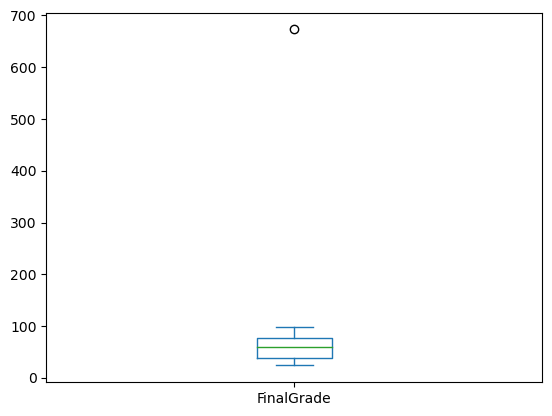

In [13]:
df["FinalGrade"].plot.box()

In [15]:
df = df[df["FinalGrade"] <= 100]

<Axes: >

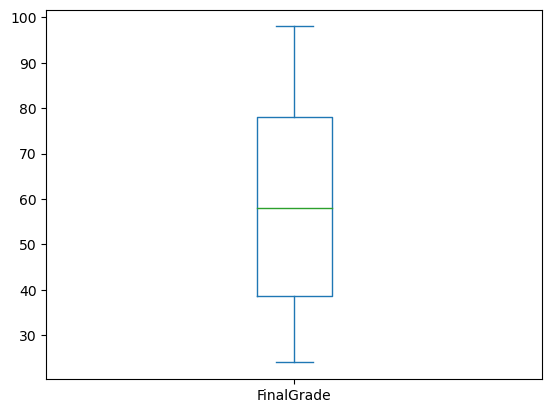

In [17]:
df["FinalGrade"].plot.box()

In [19]:
def convertGrade(score):
    if 91 <= score <= 100: 
        return "A"
    elif 81 <= score <= 90: 
        return "B"
    elif 71 <= score <= 80:
        return "C"
    elif 61 <= score <= 70:
        return "D"
    elif 51 <= score <= 60:
        return "E"
    else:
        return "F"

df["Grade"] = df["FinalGrade"].apply(convertGrade)

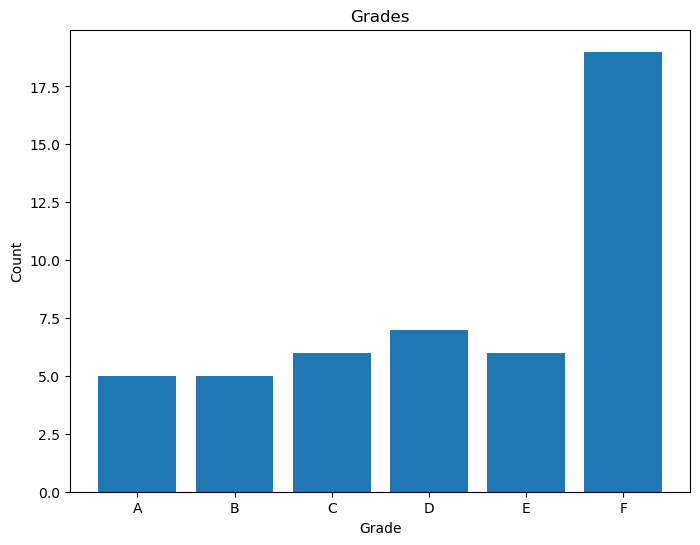

In [25]:
import matplotlib.pyplot as plt

grades_count = df['Grade'].value_counts().sort_index()

#Defining the grade labels and corresponding counts
grades = ['A', 'B', 'C', 'D', 'E', 'F']
counts = [grades_count.get(grade, 0) for grade in grades]

#Creating a bar plot

plt.figure(figsize=(8, 6))
plt.bar(grades, counts)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grades')
plt.show()

